In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def flat_for(a, f):
    a = a.reshape(-1)
    for i, v in enumerate(a):
        a[i] = f(v)

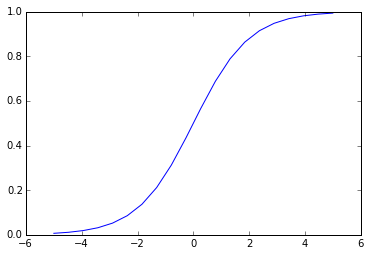

In [2]:
xs = np.linspace(-5, 5, 20)
plt.plot(xs, [sigmoid(x) for x in xs])

In [5]:
class NeuralNetwork:
    """
    basic neural network with training via backpropagation (non-vectorized)
        follows notation from Andrew Ng's Machine Learning Coursera Course (week 5)
    """
    
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.epsilon = 0.25
        np.random.seed(0)
        # one row is added for bias term
        transitions = [layer_sizes[i:i+2] for i in range(0, len(layer_sizes)-1)]
        self.layer_dim_edges = [(t[1],t[0]+1) for t in transitions]
        self.thetas      = [np.random.rand(t[0], t[1]) * 2 * self.epsilon - self.epsilon for t in self.layer_dim_edges]
        self.lambda_val  = 0.0001
        self.num_layers = len(self.thetas)
        print "layer theta initialization:"
        for theta in self.thetas:
            print theta
            print
            
    def forward_propagate(self, x):
        state = x
        activations = [self.add_bias_w(x)]
        for theta in self.thetas[:-1]:
            state = self.layer_step(theta, activations[-1])
            flat_for(state, sigmoid)
            activations.append(self.add_bias_w(state))
        activations.append(self.layer_step(self.thetas[-1], activations[-1]))
        return activations
    
    def compute_gradient(self, x, y):
        activations = self.forward_propagate(x)
        deltas = [None] * (self.num_layers+1)
        grad = [None] * self.num_layers
        deltas[-1] = activations[-1] - y
        for l in range(self.num_layers-1, 0, -1):
            deltas[l] = np.multiply(self.thetas[l].T.dot(deltas[l+1]),
                                    np.multiply(activations[l], 1.0 - activations[l]))
        for l in range(0, self.num_layers):
            # remove the change in bias term activation when propagating to earlier layers
            delta_sel = deltas[l+1] if l == self.num_layers-1 else deltas[l+1][1:,:]
            grad[l] = delta_sel.dot(activations[l].T)
        return grad
    
    def back_propagate(self, xs, ys):
        assert(len(xs) == len(ys))
        m = float(len(xs))
        D = self.compute_gradient(xs[0], ys[0])
        for x, y in zip(xs[1:], ys[1:]):
            xyD = self.compute_gradient(x, y)
            for l in range(0, self.num_layers):
                D[l] += xyD[l]
        for l in range(0, self.num_layers):
            D[l] /= m
        D[l][:,1:] += self.lambda_val * self.thetas[l][:,1:]
        return D
    
    def update(self, D):
        for i in range(0,len(self.thetas)):
            self.thetas[i] -= D[i]
    
    def add_bias_w(self, v):
        return np.vstack([np.matrix([[1]]), v])
    
    # theta(nodes_ldim x input_dim) * x_or_z(input_dim x 1)
    def layer_step(self, theta, x_or_z):
        return theta.dot(x_or_z)

In [6]:
layer_sizes = [2, 2, 1]
nn = NeuralNetwork(layer_sizes)

np.random.seed(0)
for i in range(0,10000):
    xs = [np.matrix([ary]).T + np.random.randn(2,1) * 0.05 for ary in [[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]]]
    ys = [np.matrix([ary]).T for ary in [[0.0], [1.0], [0.0], [1.0]]]
    D = nn.back_propagate(xs, ys)
    nn.update(D)

print "new thetas:"
for theta in nn.thetas:
    print theta
    print

layer theta initialization:
[[ 0.02440675  0.10759468  0.05138169]
 [ 0.02244159 -0.0381726   0.07294706]]

[[-0.03120639  0.1958865   0.23183138]]

new thetas:
[[-3.57206282  5.24338995  5.33090902]
 [ 5.08438202 -3.9695908  -4.0531141 ]]

[[-1.90011488  1.79829095  1.8486403 ]]



In [7]:
tests = [[0.0,1.0],[1.0,0.0],[0.0,0.0],[1.0,1.0]]
print tests

[nn.forward_propagate(np.matrix([t]).T)[-1] for t in tests]

[[0.0, 1.0], [1.0, 0.0], [0.0, 0.0], [1.0, 1.0]]


[matrix([[ 0.99669106]]),
 matrix([[ 1.0056668]]),
 matrix([[-0.01370508]]),
 matrix([[-0.01048806]])]